# Imports

In [120]:
import pandas as pd; import seaborn as sb; import warnings; import scipy; import re; 
import os; from analysis_helpers import *; import itertools; from scipy import stats
import random; import pandas as pd; import numpy as np; from sklearn import datasets, linear_model; 
from sklearn.linear_model import LinearRegression; import statsmodels.api as sm
from scipy import stats; from itertools import groupby; from operator import itemgetter; import random
warnings.filterwarnings('ignore')
%matplotlib inline

# Load Data

In [36]:
exp1 = pd.DataFrame.from_csv('../parsed_data/behavioral_data_sustained.csv')
exp2 = pd.DataFrame.from_csv('../parsed_data/behavioral_data_variable.csv' )

# label rows by trial number
for exp in [exp1, exp2]:

    # Number all presentation and memory trials 
    exp.loc[exp['Trial Type']=='Memory','Trial'] = list(range(0,40))*30*8
    exp.loc[exp['Trial Type']=='Presentation','Trial'] = list(range(0,10))*30*8

In [37]:
window_length=5

# Apply window function

In [38]:
def apply_window(combo, window_length):
    '''
    input:  dataframe of behavioral data from an entire experiment
    output: dataframe of same shape where raw values have been replaced by rolling window mean
    '''

    # select data from memory runs
    data = combo[combo['Trial Type']=='Memory'][['Attention Level','Familiarity Rating','Trial','Subject','Run']]

    # re-structure the data - each row is a trial, each column is an attn level
    df = data.pivot_table(index=['Subject','Run','Trial'], columns='Attention Level', values='Familiarity Rating')

    # apply rolling window, for each run in each subject
    window_data = df.groupby(['Subject','Run']).apply(lambda x: x.rolling(window_length, min_periods=1, center=True).mean())

    return(window_data)

# Go Through Each Line of Apply Window Function

### This line selects the data we want

In [133]:
data = exp1[exp1['Trial Type']=='Memory'][['Attention Level','Familiarity Rating','Trial','Subject','Run']]
data.head(n=10)

,Attention Level,Familiarity Rating,Trial,Subject,Run
80,Novel,1.0,0.0,10,0
81,Category,3.0,1.0,10,0
82,Novel,1.0,2.0,10,0
83,Full,2.0,3.0,10,0
84,Side,NaN,4.0,10,0
85,Novel,1.0,5.0,10,0
86,Novel,3.0,6.0,10,0
87,Novel,1.0,7.0,10,0
88,Novel,2.0,8.0,10,0
89,Novel,1.0,9.0,10,0


### This line reorganizes so every row is a trial

In [134]:
df = data.pivot_table(index=['Subject','Run','Trial'], columns='Attention Level', values='Familiarity Rating')
df.to_csv('row_as_trial.csv')
df.head(n=10)

Attention Level    Category  Full  None  Novel  Side
Subject Run Trial                                   
0       0   0.0         NaN   NaN   1.0    NaN   NaN
            1.0         NaN   NaN   NaN    3.0   NaN
            2.0         NaN   NaN   NaN    3.0   NaN
            3.0         NaN   NaN   NaN    1.0   NaN
            4.0         NaN   NaN   1.0    NaN   NaN
            5.0         NaN   NaN   NaN    1.0   NaN
            6.0         NaN   NaN   NaN    1.0   NaN
            7.0         NaN   NaN   NaN    1.0   NaN
            8.0         NaN   NaN   NaN    1.0   NaN
            9.0         1.0   NaN   NaN    NaN   NaN

### This row runs a sliding window over the data for each run for each subject

In [135]:
window_data = df.groupby(['Subject','Run']).apply(lambda x: x.rolling(window_length, min_periods=1, center=True).mean())
window_data.to_csv('window_applied.csv')
window_data.head(n=10)

Attention Level    Category  Full  None     Novel  Side
Subject Run Trial                                      
0       0   0.0         NaN   NaN   1.0  3.000000   NaN
            1.0         NaN   NaN   1.0  2.333333   NaN
            2.0         NaN   NaN   1.0  2.333333   NaN
            3.0         NaN   NaN   1.0  2.000000   NaN
            4.0         NaN   NaN   1.0  1.500000   NaN
            5.0         NaN   NaN   1.0  1.000000   NaN
            6.0         NaN   NaN   1.0  1.000000   NaN
            7.0         1.0   NaN   NaN  1.000000   NaN
            8.0         1.0   NaN   NaN  1.000000   NaN
            9.0         1.0   NaN   NaN  1.250000   NaN

### Average across runs, for each subject

In [136]:
new = window_data.reset_index().groupby(['Subject','Trial']).mean()
new.to_csv('av_across_runs.csv')
new.head(n=10)

Attention Level  Run  Category      Full      None     Novel      Side
Subject Trial                                                         
0       0.0      3.5  1.000000  2.000000  1.000000  1.708333  1.000000
        1.0      3.5  1.333333  2.333333  1.000000  1.583333  1.000000
        2.0      3.5  1.333333  2.250000  1.000000  1.614583  1.333333
        3.0      3.5  1.666667  2.250000  1.000000  1.666667  1.250000
        4.0      3.5  1.600000  2.250000  1.000000  1.520833  1.250000
        5.0      3.5  1.500000  2.250000  1.250000  1.437500  1.400000
        6.0      3.5  1.666667  2.000000  1.250000  1.645833  1.400000
        7.0      3.5  1.571429  1.500000  1.666667  1.666667  1.333333
        8.0      3.5  1.583333  1.500000  1.500000  1.822917  1.500000
        9.0      3.5  1.750000  1.333333  1.500000  1.781250  2.000000

### Restructure the data

In [137]:
group_melt = pd.melt(new.reset_index(), id_vars=['Subject','Trial'], 
                         value_vars=['Cateogry', 'Full','None','Novel','Side'])
group_melt.head(n=10)


,Subject,Trial,Attention Level,value
0,0,0.0,Cateogry,NaN
1,0,1.0,Cateogry,NaN
2,0,2.0,Cateogry,NaN
3,0,3.0,Cateogry,NaN
4,0,4.0,Cateogry,NaN
5,0,5.0,Cateogry,NaN
6,0,6.0,Cateogry,NaN
7,0,7.0,Cateogry,NaN
8,0,8.0,Cateogry,NaN
9,0,9.0,Cateogry,NaN


# Alternative 

Average across all runs within subjects (for each attention level), *then* do sliding window

In [138]:
# select only the data we want
data = exp1[exp1['Trial Type']=='Memory'][['Attention Level','Familiarity Rating','Trial','Subject','Run']]

# re-structure the data - each row is a trial, each column is an attn level
df = data.pivot_table(index=['Subject','Run','Trial'], columns='Attention Level', values='Familiarity Rating')

In [162]:
df.head()

,a,b,c,mean
0,NaN,2.0,2.0,2.0
1,NaN,2.0,NaN,2.0
2,4.0,NaN,1.0,2.5
3,NaN,3.0,NaN,3.0
4,3.0,NaN,4.0,3.5


In [140]:
exp1_sub_trial = df.groupby(['Subject','Trial']).mean()
exp1_sub_trial.to_csv('trial_group.csv')
exp1_sub_trial.head()

Attention Level  Category  Full  None     Novel      Side
Subject Trial                                            
0       0.0           1.0   3.0   1.0  1.333333  1.000000
        1.0           NaN   NaN   1.0  1.714286       NaN
        2.0           1.0   1.0   1.0  2.200000       NaN
        3.0           2.0   3.0   NaN  1.200000  1.000000
        4.0           NaN   2.5   1.0  3.000000  1.333333

In [159]:
# groupby subject and apply rolling window
roll = exp1_sub_trial.groupby(['Subject']).apply(lambda x: x.rolling(window_length, min_periods=1, center=True).mean())
roll.to_csv('roll_applied_trial.csv')
roll_melt = pd.melt(roll.reset_index(), id_vars=['Subject','Trial'], 
                         value_vars=['Category', 'Full','None','Novel','Side'])

In [160]:
roll.head()

Attention Level  Category      Full  None     Novel      Side
Subject Trial                                                
0       0.0      1.000000  2.000000   1.0  1.749206  1.000000
        1.0      1.333333  2.333333   1.0  1.611905  1.000000
        2.0      1.333333  2.375000   1.0  1.889524  1.111111
        3.0      1.666667  2.166667   1.0  1.889524  1.111111
        4.0      1.583333  2.166667   1.0  1.746667  1.083333

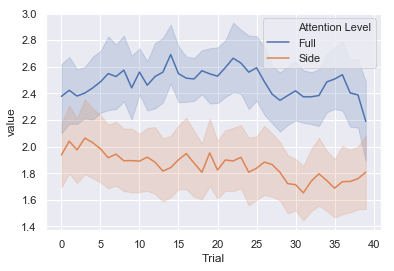

In [144]:
data = group_melt

sb.lineplot(x='Trial',y='value', hue = 'Attention Level', 
                data = data[data['Attention Level'].isin(['Full', 'Side'])]) # 'Category', # ci=None,
                    #palette = {"Full": palette[0], "Category": palette[3], "Side": palette[19], "None": palette[16], "Novel":"black"})

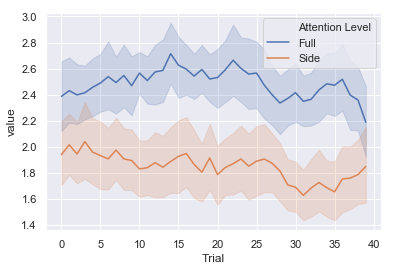

In [145]:
data = roll_melt
sb.lineplot(x='Trial',y='value', hue = 'Attention Level', 
                data = data[data['Attention Level'].isin(['Full', 'Side'])]) # 'Category', # ci=None,
                    #palette = {"Full": palette[0], "Category": palette[3], "Side": palette[19], "None": palette[16], "Novel":"black"})

# Show that taking sliding window then averaging is identical to averaging then taking window in cases without nans, but slightly differnt in cases with nans 

## Toy data wit nans

In [152]:
sample_data = {'a':np.random.choice([1, 2, 3, 4], 10, replace=True), 
               'b':np.random.choice([1, 2, 3, 4], 10, replace=True), 
               'c':np.random.choice([1, 2, 3, 4], 10, replace=True)}

In [153]:
df = pd.DataFrame(sample_data)
df['mean'] = df.mean(axis=1)
df

,a,b,c,mean
0,3,2,2,2.333333
1,3,1,3,2.333333
2,3,3,2,2.666667
3,3,3,2,2.666667
4,1,4,1,2.000000
5,1,4,1,2.000000
6,2,1,4,2.333333
7,4,1,3,2.666667
8,1,1,1,1.000000
9,4,1,4,3.000000


The 'roll_mean' is identical to 'mean' column

In [154]:
roll_df = df.rolling(4, min_periods=1, center=True).mean()
roll_df['roll_mean'] = roll_df[['a','b','c']].mean(axis=1)
roll_df

,a,b,c,mean,roll_mean
0,3.00,1.50,2.500000,2.333333,2.333333
1,3.00,2.00,2.333333,2.444444,2.444444
2,3.00,2.25,2.250000,2.500000,2.500000
3,2.50,2.75,2.000000,2.416667,2.416667
4,2.00,3.50,1.500000,2.333333,2.333333
5,1.75,3.00,2.000000,2.250000,2.250000
6,2.00,2.50,2.250000,2.250000,2.250000
7,2.00,1.75,2.250000,2.000000,2.000000
8,2.75,1.00,3.000000,2.250000,2.250000
9,3.00,1.00,2.666667,2.222222,2.222222


## Toy data without nans

In [155]:
sample_data = {'a':np.random.choice([1, 2, 3, 4, np.nan, np.nan, np.nan, np.nan], 10, replace=True), 
               'b':np.random.choice([1, 2, 3, 4, np.nan, np.nan, np.nan, np.nan], 10, replace=True), 
               'c':np.random.choice([1, 2, 3, 4, np.nan, np.nan, np.nan, np.nan], 10, replace=True)}

In [156]:
df = pd.DataFrame(sample_data)
df['mean'] = df.mean(axis=1)
df

,a,b,c,mean
0,NaN,2.0,2.0,2.000000
1,NaN,2.0,NaN,2.000000
2,4.0,NaN,1.0,2.500000
3,NaN,3.0,NaN,3.000000
4,3.0,NaN,4.0,3.500000
5,NaN,1.0,NaN,1.000000
6,4.0,4.0,3.0,3.666667
7,NaN,NaN,2.0,2.000000
8,2.0,NaN,3.0,2.500000
9,4.0,2.0,NaN,3.000000


The 'roll_mean' column differs slightly from 'mean' column

In [157]:
roll_df = df.rolling(4, min_periods=1, center=True).mean()
roll_df['roll_mean'] = roll_df[['a','b','c']].mean(axis=1)
roll_df

,a,b,c,mean,roll_mean
0,NaN,2.000000,2.000000,2.000000,2.000000
1,4.000000,2.000000,1.500000,2.166667,2.500000
2,4.000000,2.333333,1.500000,2.375000,2.611111
3,3.500000,2.500000,2.500000,2.750000,2.833333
4,3.500000,2.000000,2.500000,2.500000,2.666667
5,3.500000,2.666667,3.500000,2.791667,3.222222
6,3.500000,2.500000,3.000000,2.541667,3.000000
7,3.000000,2.500000,2.666667,2.291667,2.722222
8,3.333333,3.000000,2.666667,2.791667,3.000000
9,3.000000,2.000000,2.500000,2.500000,2.500000
